#### 1. Teilaufgabe
Schreiben Sie -- ohne Verwendung von numpy oder pandas -- eine Funktion, die eine csv-Datei einliest und ein Dictionary ausgibt.

Die key/value-Paare des Dictionaries sollen als key den jeweiligen Spaltennamen und als Value eine Liste der Werte in dieser Spalte haben.

Wenden Sie die Funktion auf die Datei `heart.csv` an.


In [46]:
import csv

def read_csv_to_dict(filename):
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        csv_headers = next(csv_reader)
        heart_dict = {header: [] for header in csv_headers}
        for row in csv_reader:
            for idx, value in enumerate(row):
                heart_dict[csv_headers[idx]].append(value)
    return heart_dict

# Anwendung der Funktion auf 'heart.csv'
heart_data = read_csv_to_dict('datasets/heart.csv')
heart_data

{'Age': ['40',
  '49',
  '37',
  '48',
  '54',
  '39',
  '45',
  '54',
  '37',
  '48',
  '37',
  '58',
  '39',
  '49',
  '42',
  '54',
  '38',
  '43',
  '60',
  '36',
  '43',
  '44',
  '49',
  '44',
  '40',
  '36',
  '53',
  '52',
  '53',
  '51',
  '53',
  '56',
  '54',
  '41',
  '43',
  '32',
  '65',
  '41',
  '48',
  '48',
  '54',
  '54',
  '35',
  '52',
  '43',
  '59',
  '37',
  '50',
  '36',
  '41',
  '50',
  '47',
  '45',
  '41',
  '52',
  '51',
  '31',
  '58',
  '54',
  '52',
  '49',
  '43',
  '45',
  '46',
  '50',
  '37',
  '45',
  '32',
  '52',
  '44',
  '57',
  '44',
  '52',
  '44',
  '55',
  '46',
  '32',
  '35',
  '52',
  '49',
  '55',
  '54',
  '63',
  '52',
  '56',
  '66',
  '65',
  '53',
  '43',
  '55',
  '49',
  '39',
  '52',
  '48',
  '39',
  '58',
  '43',
  '39',
  '56',
  '41',
  '65',
  '51',
  '40',
  '40',
  '46',
  '57',
  '48',
  '34',
  '50',
  '39',
  '59',
  '57',
  '47',
  '38',
  '49',
  '33',
  '38',
  '59',
  '35',
  '34',
  '47',
  '52',
  '46',
  '58',
 

#### 2. Teilaufgabe
Schreiben Sie  -- ohne Verwendung von numpy oder pandas -- eine Funktion, die als Argumente einen Datenvektor v sowie einen {0,1}-wertigen Zielvektor z bekommt.

Die Funktion soll mittels einer List Comprehension zwei Teilvektoren v_0, v_1 zurückgeben: v_0 beinhaltet nur die Elemente, für die (am entsprechenden Index) z den Wert 0 hat, analog v_1.

(Hinweis: Mit "return v_0, v_1" können Sie zwei Rückgabewerte definieren.)


In [47]:
# Ohne Numpy
def apply_target_vec(v, z):
	v_0 = [data for idx, data in enumerate(v) if z[idx] == 0]
	v_1 = [data for idx, data in enumerate(v) if z[idx] == 1]
	return v_0, v_1

split_tuple = apply_target_vec([1, 2, 3, 4], [1, 0, 1, 0])
split_tuple

([2, 4], [1, 3])

In [48]:
# Mit Numpy - nur zu Verständnis-Zwecken
import numpy as np
def np_apply_target_vec(v, z):
	v_0 = v[np.invert(z)]
	v_1 = v[z]
	return v_0, v_1

split_tuple = np_apply_target_vec(np.array([1, 2, 3, 4]), np.array([True, False, True, False]))
split_tuple

(array([2, 4]), array([1, 3]))

#### 3. Teilaufgabe

Visualisieren und vergleichen Sie für jede der numerischen Spalten des Heart-Datensatzes die Teilpopulationen, für die HeartDisease=0 bzw. 1 ist.

Bewerten Sie, für wie aussagekräftig Sie die jeweiligen Spalten halten zur Vorhersage von HeartDisease.

(Hinweis: mit "import pandas as pd; vec = pd.Series ( meine_liste )" können Sie eine Liste in eine Series konvertieren und dann die Funktionalität vec.plot.hist(...) wie in der Vorlesung gezeigt anwenden.)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/heart.csv')
def plot_heart_disease_metric(column):
	idx0 = df["HeartDisease"] == 0
	vec_healthy = df[column][idx0]
	vec_ill 	= df[column][~idx0]

	vec_healthy.hist(alpha=0.6, label='healthy')
	vec_ill.hist(alpha=0.3, label='ill')
	plt.legend()
	plt.title(column)
	plt.show()

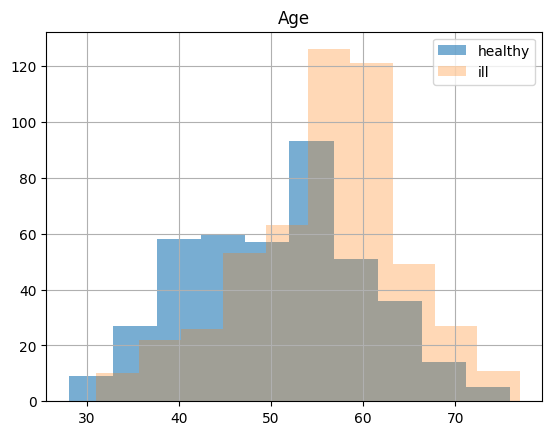

In [66]:
plot_heart_disease_metric('Age')

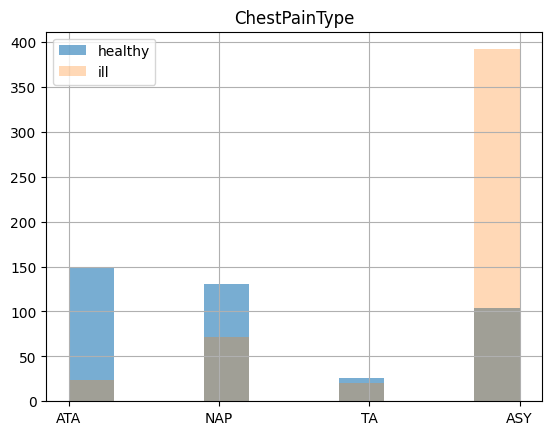

In [51]:
plot_heart_disease_metric('ChestPainType')

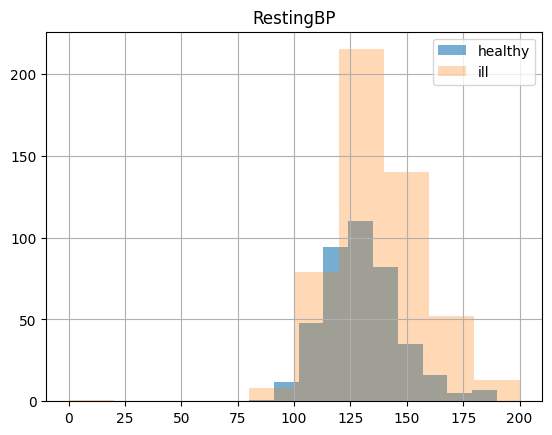

In [52]:
plot_heart_disease_metric('RestingBP')

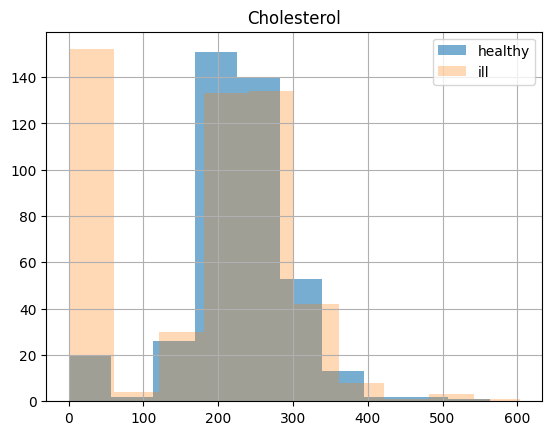

In [53]:
plot_heart_disease_metric('Cholesterol')

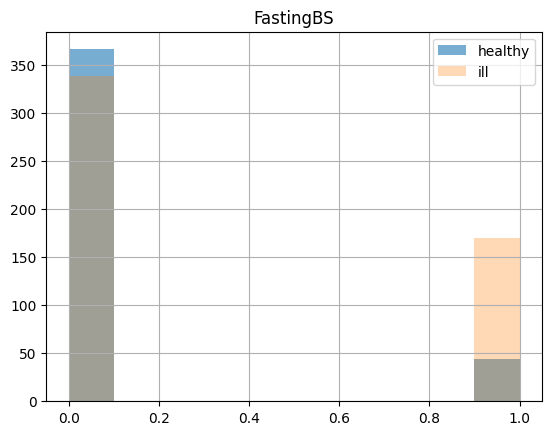

In [54]:
plot_heart_disease_metric('FastingBS')

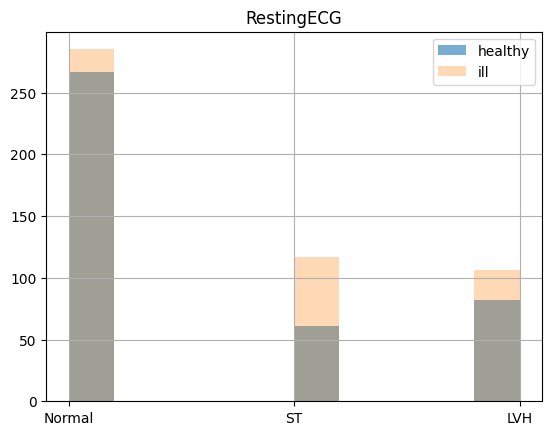

In [55]:
plot_heart_disease_metric('RestingECG')

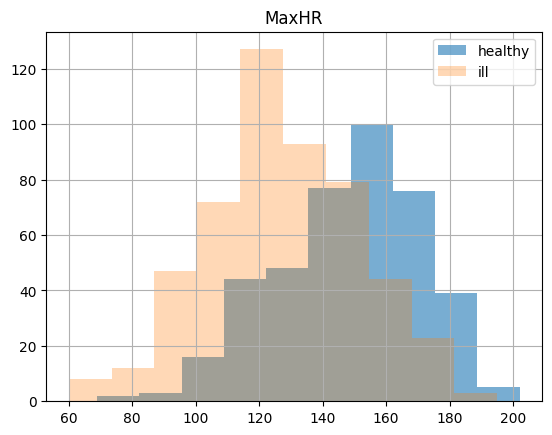

In [56]:
plot_heart_disease_metric('MaxHR')

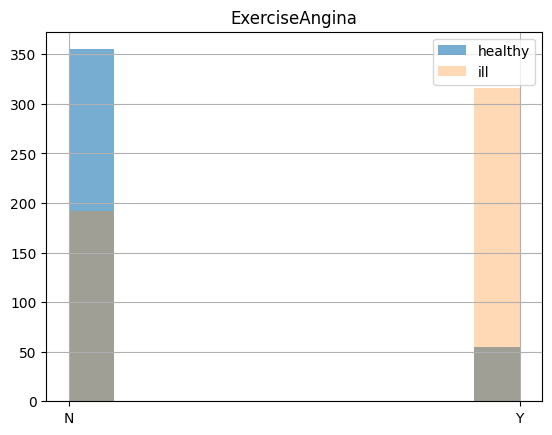

In [57]:
plot_heart_disease_metric('ExerciseAngina')

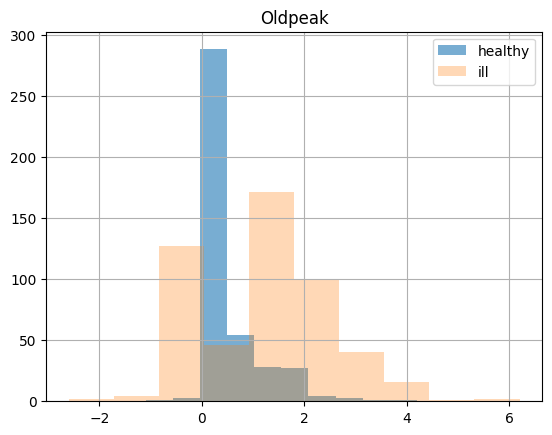

In [58]:
plot_heart_disease_metric('Oldpeak')

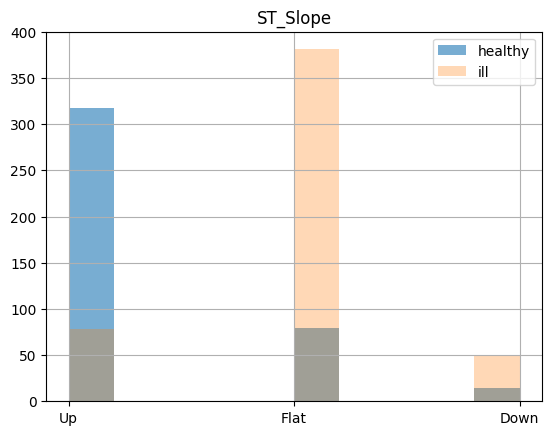

In [59]:
plot_heart_disease_metric('ST_Slope')

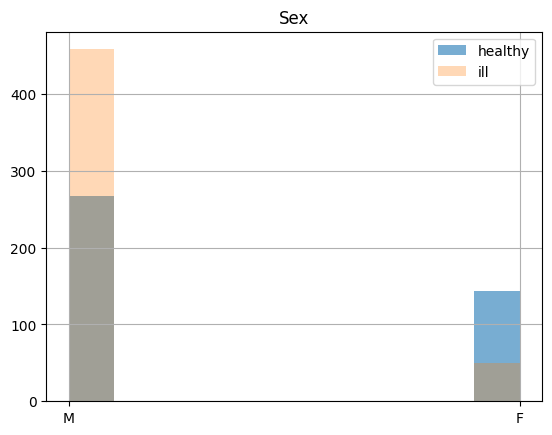

In [ ]:
plot_heart_disease_metric('Sex')

## Auswertungsergebnisse
* Alter: ab 55 steigt Risiko für Herzerkrankungen
* Brustschmerzen: Patienten mit ASY haben deutlich erhöhtes Risiko für Hererkrankungen
* Ruhepuls: ab einem Puls von 120 steigt Risiko für Herzerkrankungen
* Geschlecht: Männer haben ein höheres Risiko für Herzerkrankungen


#### 4. Teilaufgabe

Bei einem Overlay ("Übereinanderplotten") zweier Histogramme müssen die Bin-Grenzen nicht notwendigerweise übereinstimmen.

Recherchieren Sie in der Dokumentation, wie das vermieden werden kann, und setzen Sie das entsprechend um.
